In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os 
import glob 
import pathlib
import process_data_saxs as pds
import plot_saxs_curves as ps
import save_saxs_data as ssd

In [12]:
path = r'C:\Users\krim\Desktop\10800s'
path= pathlib.PureWindowsPath(path).as_posix()+'/'
print(path)

C:/Users/krim/Desktop/10800s/


CHECK THE SAMPLES POSITION AND INDEX FOR BACKGROUND SUBSTRACTION
0 01.empty_10800s_unwarped_exported.dat_counts
1 02.PBS_10800s_unwarped_exported.dat_counts
2 03.emptybeam_10800s_unwarped_exported.dat_counts
3 LNP_HSA_diluted_1_10_10800s_unwarped_exported.dat_counts
4 LNP_HSA_diluted_1_2_10800s_unwarped_exported.dat_counts


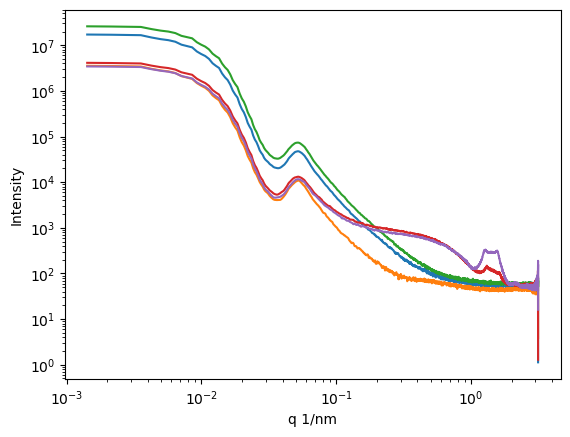

In [13]:
qdata,idata,err_data, B, sample_name = pds.import_scattering_data(path,plot = True)

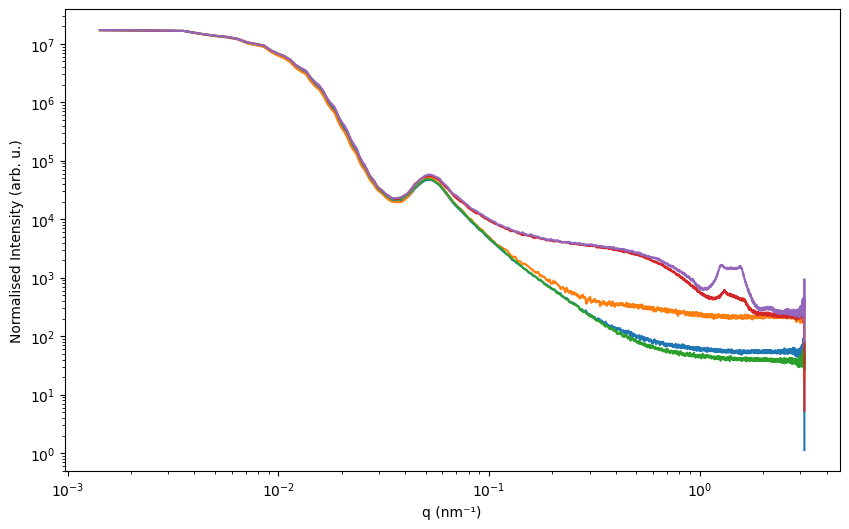

In [14]:
idata_corrected, transmission_data, err_corrected = pds.transmission_correction(idata, err_data)
ps.plot_scattering_curves(qdata, idata_corrected, ylabel = 'Normalised Intensity (arb. u.)')

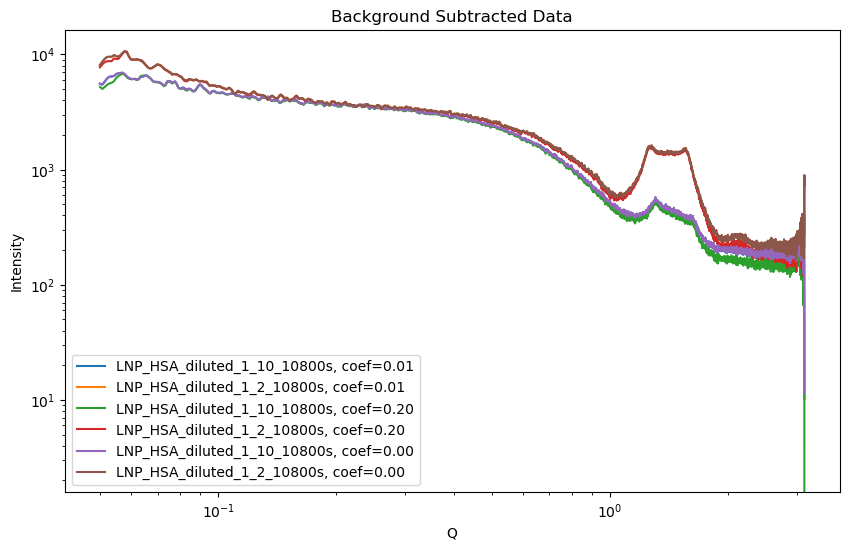

In [15]:
Qdata, Idata,Err, sname,bck_coef,avg =  pds.background_subtraction(idata_corrected,err_corrected,qdata,sample_name,averaging=False, air = 0, capillary = 1 ,water = 2, bck_coef = [0.01,0.2,0.0003], q_lim = 147)


In [16]:
print(Err)

[array([2089.26584071, 2096.12919038, 2098.31918796, ...,  336.23830871,
        373.53751338,  423.37474697]), array([2169.46337707, 2180.34467777, 2183.14393642, ...,  510.83117552,
        603.02889363,  731.28025117]), array([1952.35836509, 1958.26317308, 1960.11277707, ...,  310.08127318,
        344.32625206,  389.18603576]), array([2037.95063164, 2048.15526418, 2050.66236407, ...,  494.00676678,
        585.3837549 ,  712.03258339]), array([2096.76708234, 2103.68195491, 2105.89021543, ...,  337.66192494,
        375.12700336,  425.23248538]), array([2176.68826176, 2187.60670565, 2190.42179317, ...,  511.76934766,
        604.01476911,  732.3573554 ])]


In [17]:
if (avg):
    ssd.save_1D_average_data(path,sname,Qdata,Idata,Err)
else:
    ssd.save_1D_data(path, sname, Qdata, Idata, Err)

1D data have been saved at: C:/Users/krim/Desktop/10800s/1D
